In [2]:
import pandas as pd
import numpy as np
import math
from numba import njit, prange
import matplotlib.pyplot as plt
import seaborn as sns

## Create distance Matrix

In [3]:
task_df=pd.read_csv('E:/glass_git/Contest/Smart_Port_AVG/data/task.csv')
task_df['ID']=task_df.index
task_df.to_csv('E:/glass_git/Contest/Smart_Port_AVG/data/task_re.csv',index=False)

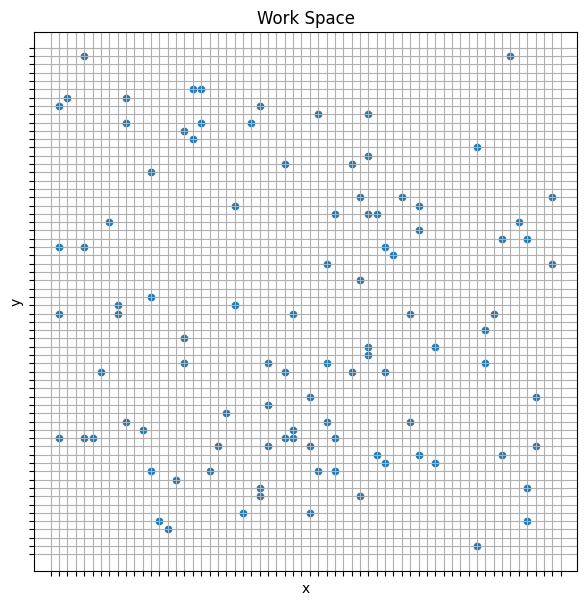

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(task_df, x='x', y='y')

plt.xticks(np.arange(-1, 61, 1))  
plt.yticks(np.arange(-1, 61, 1))  
plt.tick_params(axis='x', labelbottom=False)  
plt.tick_params(axis='y', labelleft=False)  
plt.grid()
plt.title('Work Space')
plt.show()
plt.close()

In [9]:
@njit
def distance(x1,y1,x2,y2):
    return abs(x1-x2)+abs(y1+y2)

@njit(parallel=True)
def build_dist_mat(task_id,X,Y):
    N = task_id.shape[0]
    M = np.zeros((N, N), dtype=np.float64)
    for i in prange(N):
        xi, yi = X[i], Y[i]
        M[i, i] = 0.0
        for j in range(i + 1, N):
            d = distance(xi, yi, X[j], Y[j])
            M[i, j] = d
            M[j, i] = d
    return M


task_locate=task_df[['ID','x','y']].to_numpy()
task_locate=np.insert(task_locate,0,np.array([-1,0,0]),axis=0)
task_id=task_locate[:,0]
X=task_locate[:,1]
Y=task_locate[:,2]

distance_matrix=build_dist_mat(task_id,X,Y)

In [ ]:
distance_df=pd.DataFrame(distance_matrix, index=task_id, columns=task_id)


In [11]:
distance_df

,-1,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
-1,0.0,55.0,40.0,16.0,61.0,48.0,93.0,83.0,59.0,68.0,...,90.0,39.0,83.0,84.0,28.0,68.0,56.0,77.0,75.0,41.0
0,55.0,0.0,41.0,65.0,42.0,43.0,58.0,56.0,24.0,89.0,...,55.0,88.0,76.0,65.0,83.0,51.0,55.0,58.0,40.0,74.0
1,40.0,41.0,0.0,50.0,47.0,34.0,79.0,69.0,45.0,74.0,...,76.0,73.0,69.0,70.0,68.0,54.0,42.0,63.0,61.0,59.0
2,16.0,65.0,50.0,0.0,71.0,58.0,103.0,93.0,69.0,78.0,...,100.0,49.0,93.0,94.0,44.0,78.0,66.0,87.0,85.0,51.0
3,61.0,42.0,47.0,71.0,0.0,49.0,80.0,70.0,46.0,95.0,...,77.0,94.0,82.0,71.0,89.0,57.0,61.0,64.0,62.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68.0,51.0,54.0,78.0,57.0,56.0,89.0,79.0,55.0,102.0,...,86.0,101.0,89.0,80.0,96.0,0.0,68.0,73.0,71.0,87.0
96,56.0,55.0,42.0,66.0,61.0,48.0,93.0,83.0,59.0,90.0,...,90.0,89.0,83.0,84.0,84.0,68.0,0.0,77.0,75.0,75.0
97,77.0,58.0,63.0,87.0,64.0,65.0,96.0,86.0,62.0,111.0,...,93.0,110.0,98.0,87.0,105.0,73.0,77.0,0.0,78.0,96.0
98,75.0,40.0,61.0,85.0,62.0,63.0,56.0,76.0,22.0,109.0,...,59.0,108.0,96.0,85.0,103.0,71.0,75.0,78.0,0.0,94.0


In [13]:
distance_df.to_pickle('E:/glass_git/AGV_VRP/data/distance_matrix.pkl')